This time, we are going to work with an already defined $Ca^{2+}$ imaging pipeline. Start as always by importing `datajoint`.

In [1]:
import datajoint as dj

And now import the `calium.py` module with the pipeline definition.

In [2]:
import calcium as ca

Connecting dimitri@pni.datajoint.io:3306


The module defines a pipeline as can be seen with the ERD.

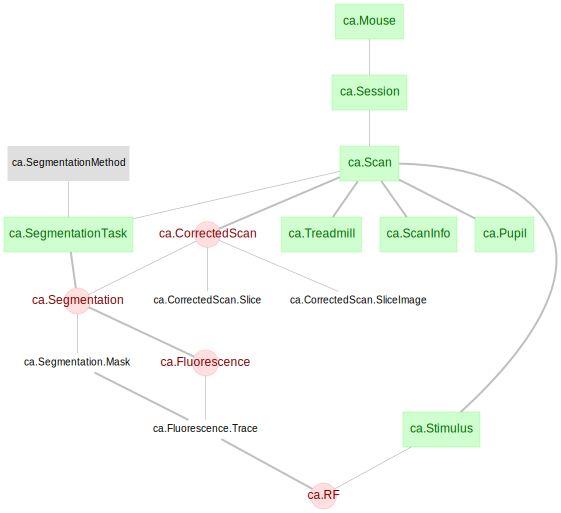

In [3]:
dj.ERD(ca)

We can see existing scans.

In [4]:
ca.Scan()

mouse_id Unique animal ID,session session number,scan_idx scan ID,depth Scan depth from the surface (microns),laser_power Laser power (mW),wavelength Laser wavelength (nm),filename Scan base filename
8623,1,5,135,26,920,m8623A_00005
8804,1,3,123,24,920,m8804A_00003


...and fetch the scans data!

In [5]:
a = ca.Scan.fetch()

Fetched data is returned as `numpy` structured array.

In [6]:
a['wavelength']

array([920, 920])

We can find all slices across all scans in `CorrectedScan.Slice()` table.

In [7]:
ca.CorrectedScan.Slice()

mouse_id Unique animal ID,session session number,scan_idx scan ID,slice slice index,template image used as alignment template,y_shifts (pixels) y motion correction shifts,x_shifts (pixels) x motion correction shifts,y_std (um) standard deviation of y shifts,x_std (um) standard deviation of x shifts,outlier_frames mask with true for frames with high y shifts (already corrected)
8623,1,5,1,=BLOB=,=BLOB=,=BLOB=,0.600762,0.356006,=BLOB=
8623,1,5,2,=BLOB=,=BLOB=,=BLOB=,0.63599,0.368543,=BLOB=
8623,1,5,3,=BLOB=,=BLOB=,=BLOB=,0.630024,0.370813,=BLOB=
8804,1,3,1,=BLOB=,=BLOB=,=BLOB=,0.396291,0.436713,=BLOB=
8804,1,3,2,=BLOB=,=BLOB=,=BLOB=,0.408898,0.443068,=BLOB=
8804,1,3,3,=BLOB=,=BLOB=,=BLOB=,0.395769,0.446396,=BLOB=


Instead of fetching all data at once, you can fetch only the primary keys by fetching `'KEY'`

In [ ]:
keys = ca.CorrectedScan.Slice.fetch('KEY')

In [9]:
keys

[{'mouse_id': 8623, 'scan_idx': 5, 'session': 1, 'slice': 1},
 {'mouse_id': 8623, 'scan_idx': 5, 'session': 1, 'slice': 2},
 {'mouse_id': 8623, 'scan_idx': 5, 'session': 1, 'slice': 3},
 {'mouse_id': 8804, 'scan_idx': 3, 'session': 1, 'slice': 1},
 {'mouse_id': 8804, 'scan_idx': 3, 'session': 1, 'slice': 2},
 {'mouse_id': 8804, 'scan_idx': 3, 'session': 1, 'slice': 3}]

and you can use this to restrict and view one slice at a time...

In [10]:
ca.CorrectedScan.Slice & keys[0]

mouse_id Unique animal ID,session session number,scan_idx scan ID,slice slice index,template image used as alignment template,y_shifts (pixels) y motion correction shifts,x_shifts (pixels) x motion correction shifts,y_std (um) standard deviation of y shifts,x_std (um) standard deviation of x shifts,outlier_frames mask with true for frames with high y shifts (already corrected)
8623,1,5,1,=BLOB=,=BLOB=,=BLOB=,0.600762,0.356006,=BLOB=


...and fetch data for only a specific slice. You can also fetch specific attribute only (e.g. 'template') and not the entire row of data:

In [11]:
m = (ca.CorrectedScan.Slice & keys[0]).fetch1('template')

Let's now take a look at the fetched slice.

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams

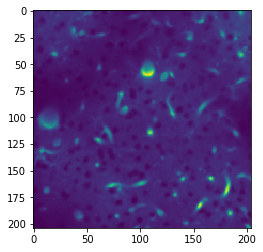

In [13]:
plt.imshow(m)

In [20]:
slices = ca.CorrectedScan.SliceImage()
len(slices)

12

We can also iterate through the slices in the table and plot them side by side. Iterator returns restricted relation.

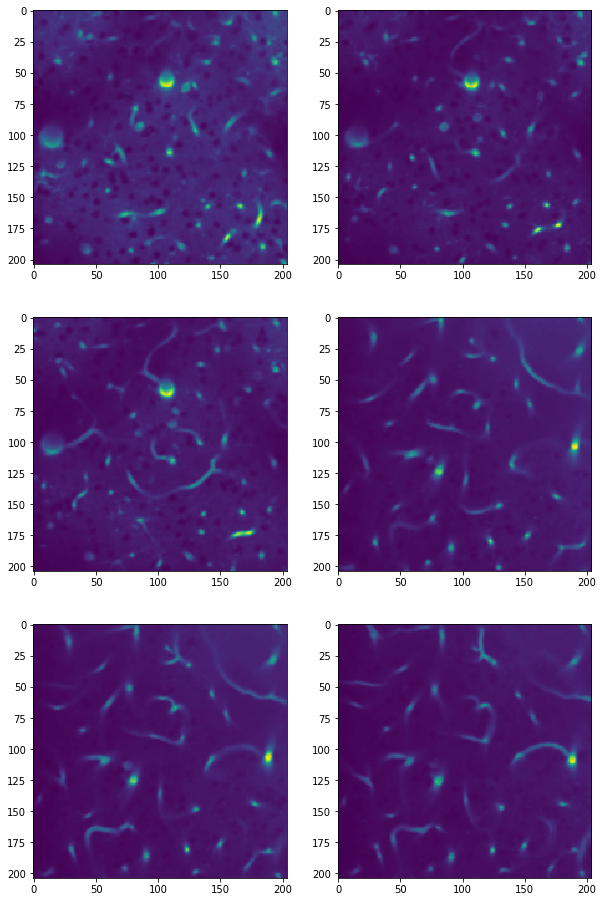

In [19]:
rcParams['figure.figsize'] = (10,16)
for i, m in enumerate(slices):
    plt.subplot(3, 2, i+1)
    plt.imshow(m['template'])

In [16]:
ca.CorrectedScan()

mouse_id Unique animal ID,session session number,scan_idx scan ID,align_time automatic
8623,1,5,2018-01-10 00:49:50
8804,1,3,2018-01-10 00:49:50


In [21]:
ca.CorrectedScan.SliceImage()

mouse_id Unique animal ID,session session number,scan_idx scan ID,slice slice index,channel recording channel,average_image motion-corrected average image
8623,1,5,1,1,=BLOB=
8623,1,5,1,2,=BLOB=
8623,1,5,2,1,=BLOB=
8623,1,5,2,2,=BLOB=
8623,1,5,3,1,=BLOB=
8623,1,5,3,2,=BLOB=
8804,1,3,1,1,=BLOB=


In [ ]:
import numpy as np
rcParams['figure.figsize'] = (10,16)
for i, key in enumerate(ca.CorrectedScan.Slice.fetch('KEY')):
    im1 = (ca.CorrectedScan.SliceImage & key & 'channel=1').fetch1('average_image')
    im2 = (ca.CorrectedScan.SliceImage & key & 'channel=2').fetch1('average_image')
    plt.subplot(3, 2, i+1)
    plt.imshow(np.stack((im1/im1.max(),im2/im2.max(),im2*0),axis=2))

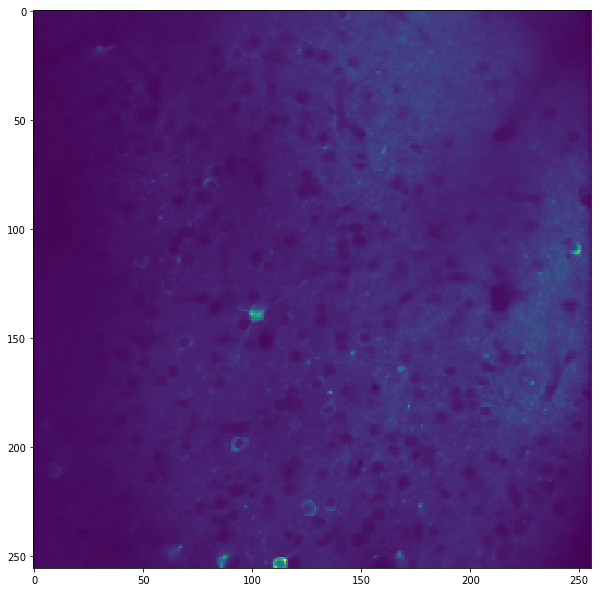

In [37]:
plt.imshow(np.stack((im1,im2,im2*0))

In [ ]:
im1.dtype